In [1]:
import pandas as pd

In [2]:
#한글파일 읽어오면 utf-8 관련 에러발생
#encoding= 'ISO-8859-1' 추가하면 에러는 피할 수 있지만 한글은 여전히 깨짐
#engine = 'python' 추가하면 에러도 피하고 한글도 안 깨짐

spring = pd.read_csv('data/all_spring.csv', engine = 'python')

In [3]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,하버드 상위 1퍼센트의 비밀,신호를 차단하고 깊이 몰입하라,20181017.0,자기계발,16000.0,9.2,324,1,15,1,1
1,날씨가 좋으면 찾아가겠어요(드라마 방영 기념 한정판),이도우 장편소설,20200201.0,소설,13800.0,9.5,432,0,14,2,1
2,당신이 옳다(교보문고 단독 리커버)(찰스 장 아트 에디션),정혜신의 적정심리학,20181010.0,인문,15800.0,9.2,316,1,6,3,1
3,1cm 다이빙(썸머 캣 에디션),"현실에서 딱 1cm 벗어나는 행복을 찾아, 일센티 다이빙",20200121.0,시/에세이,13500.0,8.9,248,1,7,4,1
4,내가 원하는 것을 나도 모를 때(여름 특별판),잃어버린 나를 찾는 인생의 문장들,20200108.0,인문,16000.0,9.0,320,1,17,5,1


In [4]:
spring.loc[spring['분야'] == '소설', '분야'] = 1
spring.loc[spring['분야'] == '시/에세이', '분야'] = 2
spring.loc[spring['분야'] == '인문', '분야'] = 3
spring.loc[spring['분야'] == '가정/육아', '분야'] = 4
spring.loc[spring['분야'] == '요리', '분야'] = 5
spring.loc[spring['분야'] == '건강', '분야'] = 6
spring.loc[spring['분야'] == '취미/실용/스포츠', '분야'] = 7
spring.loc[spring['분야'] == '경제/경영', '분야'] = 8
spring.loc[spring['분야'] == '자기계발', '분야'] = 9
spring.loc[spring['분야'] == '정치/사회', '분야'] = 10
spring.loc[spring['분야'] == '역사/문화', '분야'] = 11
spring.loc[spring['분야'] == '종교', '분야'] = 11
spring.loc[spring['분야'] == '예술/대중문화', '분야'] = 11
spring.loc[spring['분야'] == '한국소개도서', '분야'] = 11
spring.loc[spring['분야'] == '중/고등참고서', '분야'] = 12
spring.loc[spring['분야'] == '대학교재', '분야'] = 12
spring.loc[spring['분야'] == '기술/공학', '분야'] = 13
spring.loc[spring['분야'] == '컴퓨터/IT', '분야'] = 13
spring.loc[spring['분야'] == '외국어', '분야'] = 14
spring.loc[spring['분야'] == '여행', '분야'] = 14
spring.loc[spring['분야'] == '과학', '분야'] = 15
spring.loc[spring['분야'] == '취업/수험서', '분야'] = 16
spring.loc[spring['분야'] == '자격증/수험서작가', '분야'] = 16
spring.loc[spring['분야'] == '잡지', '분야'] = 17
spring.loc[spring['분야'] == '만화', '분야'] = 17
spring.loc[spring['분야'] == ':K컬렉션', '분야'] = 17
spring.loc[spring['분야'] == '청소년', '분야'] = 18
spring.loc[spring['분야'] == '초등참고서', '분야'] = 19
spring.loc[spring['분야'] == '어린이(초등)', '분야'] = 19
spring.loc[spring['분야'] == '어린이전집', '분야'] = 19
spring.loc[spring['분야'] == '어린이영어', '분야'] = 19
spring.loc[spring['분야'] == '유아(0~7세)', '분야'] = 20
spring.loc[spring['분야'] == '', '분야'] = 0

In [5]:
spring.loc[spring['쪽수'] == '준비중', '쪽수'] = 371
spring.loc[spring['쪽수'] == '210 * 270 mm  판형알림', '쪽수'] = 371
spring.loc[spring['쪽수'] == '178 * 238 * 18 mm /357g  판형알림', '쪽수'] = 371

D:\ProgramData\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
spring.loc[spring['부제목'].notnull(), '부제목'] = 1
spring.loc[spring['부제목'].isnull(), '부제목'] = 0

In [7]:
spring['정가'] = spring['정가'].fillna(spring['정가'].mean())
spring['평점'] = spring['평점'].fillna(spring['평점'].mean())
spring.loc[spring['분야'].isnull(), '분야'] = 0

In [8]:
spring['쪽수'] = spring['쪽수'].astype(int)
spring['분야'] = spring['분야'].astype(int)

In [9]:
print(spring['쪽수'].dtype)
print(spring['분야'].dtype)
print(spring['제목 길이'].dtype)
print(spring['정가'].dtype)

int32
int32
int64
float64


In [10]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,하버드 상위 1퍼센트의 비밀,1,20181017.0,9,16000.0,9.2,324,1,15,1,1
1,날씨가 좋으면 찾아가겠어요(드라마 방영 기념 한정판),1,20200201.0,1,13800.0,9.5,432,0,14,2,1
2,당신이 옳다(교보문고 단독 리커버)(찰스 장 아트 에디션),1,20181010.0,3,15800.0,9.2,316,1,6,3,1
3,1cm 다이빙(썸머 캣 에디션),1,20200121.0,2,13500.0,8.9,248,1,7,4,1
4,내가 원하는 것을 나도 모를 때(여름 특별판),1,20200108.0,3,16000.0,9.0,320,1,17,5,1


In [11]:
spring.tail()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
4316,키다리 아저씨(Daddy-Long-Legs)(걸 클래식 컬렉션 2)(양장본 Hard...,0,20200520.0,1,12800.0,8.3,260,1,7,0,0
4317,장난을 잘 치는 전 타카기 양. 8,0,20200531.0,17,5500.0,10.0,140,1,19,0,0
4318,아기지능방 물속동물 퍼즐(New),1,20200310.0,20,13000.0,0.0,12,0,13,0,0
4319,미라클 액션,1,20200501.0,9,14000.0,9.6,249,1,6,0,0
4320,신용한 행정학 실전형 동형 모의고사 Part. 7(2020)(난공불락),0,20200513.0,16,7000.0,10.0,112,0,27,0,0


In [12]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,하버드 상위 1퍼센트의 비밀,1,20181017.0,9,16000.0,9.2,324,1,15,1,1
1,날씨가 좋으면 찾아가겠어요(드라마 방영 기념 한정판),1,20200201.0,1,13800.0,9.5,432,0,14,2,1
2,당신이 옳다(교보문고 단독 리커버)(찰스 장 아트 에디션),1,20181010.0,3,15800.0,9.2,316,1,6,3,1
3,1cm 다이빙(썸머 캣 에디션),1,20200121.0,2,13500.0,8.9,248,1,7,4,1
4,내가 원하는 것을 나도 모를 때(여름 특별판),1,20200108.0,3,16000.0,9.0,320,1,17,5,1


In [13]:
spring.tail()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
4316,키다리 아저씨(Daddy-Long-Legs)(걸 클래식 컬렉션 2)(양장본 Hard...,0,20200520.0,1,12800.0,8.3,260,1,7,0,0
4317,장난을 잘 치는 전 타카기 양. 8,0,20200531.0,17,5500.0,10.0,140,1,19,0,0
4318,아기지능방 물속동물 퍼즐(New),1,20200310.0,20,13000.0,0.0,12,0,13,0,0
4319,미라클 액션,1,20200501.0,9,14000.0,9.6,249,1,6,0,0
4320,신용한 행정학 실전형 동형 모의고사 Part. 7(2020)(난공불락),0,20200513.0,16,7000.0,10.0,112,0,27,0,0


In [14]:
spring = spring[['부제목', '분야', '정가', '평점', '쪽수', 'eBook 여부', '제목 길이', '순위', '베스트셀러 여부']]

In [15]:
spring.isnull().sum()

부제목         0
분야          0
정가          0
평점          0
쪽수          0
eBook 여부    0
제목 길이       0
순위          0
베스트셀러 여부    0
dtype: int64

In [16]:
spring.isnull().sum()

부제목         0
분야          0
정가          0
평점          0
쪽수          0
eBook 여부    0
제목 길이       0
순위          0
베스트셀러 여부    0
dtype: int64

In [17]:
print(spring['평점'].dtypes)
print(spring['정가'].dtypes)
print(spring['분야'].dtypes)
print(spring['eBook 여부'].dtypes)
print(spring['부제목'].dtypes)
print(spring['쪽수'].dtypes)
print(spring['제목 길이'].dtypes)

float64
float64
int32
int64
object
int32
int64


## 로지스틱 회귀분석

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [19]:
x_data = spring[['부제목', '쪽수', 'eBook 여부', '제목 길이','정가','평점']] 
y_data = spring['베스트셀러 여부']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)

In [21]:
x_data.head()

,부제목,쪽수,eBook 여부,제목 길이,정가,평점
0,1,324,1,15,16000.0,9.2
1,1,432,0,14,13800.0,9.5
2,1,316,1,6,15800.0,9.2
3,1,248,1,7,13500.0,8.9
4,1,320,1,17,16000.0,9.0


In [22]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델 피팅(학습시키기)
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train)) #정확도
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.66
검증용 데이터셋 정확도 : 0.68


In [23]:
import statsmodels.api as sm

In [24]:
pd.DataFrame(range(100)).dtypes
logit = sm.Logit(y_data.astype(float), x_data.astype(float)) 
result = logit.fit()
# est = sm.OLS (y.astype (float), X.astype (array)). fit ()

Optimization terminated successfully.
         Current function value: 0.621473
         Iterations 6


In [25]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.103      
Dependent Variable: 베스트셀러 여부         AIC:              5382.7684  
Date:               2020-07-22 22:56 BIC:              5420.9958  
No. Observations:   4321             Log-Likelihood:   -2685.4    
Df Model:           5                LL-Null:          -2994.5    
Df Residuals:       4315             LLR p-value:      2.3896e-131
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
부제목            0.0947    0.0704    1.3456  0.1784  -0.0432   0.2327
쪽수             0.0021    0.0003    7.3047  0.0000   0.0016   0.0027
eBook 여부       0.2293    0.0665    3.4498  0.0006   0.0990   0.3596
제목 길이         -0.0323    0.0051   -6.3134  0.0000  -0.0424  -0.0223
정가            -0.0001    0.0000  -15.4902  0.0000  -0.0002  -0.0001
평점             0.1941    0.0118   16.4893  0.0000   0.1710   0.2172
==================================================================

"""

## 오즈비
#### 1에 가까울 수록 종속변수와 관련 없는것 (다른 설명변수는 고정)

In [26]:
np.exp(result.params)

부제목         1.099365
쪽수          1.002122
eBook 여부    1.257744
제목 길이       0.968170
정가          0.999866
평점          1.214224
dtype: float64

## X간 상관관계 확인

In [27]:
x_data.corr()

,쪽수,eBook 여부,제목 길이,정가,평점
쪽수,1.000000,-0.006510,-0.018090,0.491993,0.025975
eBook 여부,-0.006510,1.000000,-0.154824,-0.070302,0.114914
제목 길이,-0.018090,-0.154824,1.000000,0.030233,-0.009347
정가,0.491993,-0.070302,0.030233,1.000000,-0.060420
평점,0.025975,0.114914,-0.009347,-0.060420,1.000000


In [28]:
spring_x = spring[['부제목', '분야', '정가', '평점', '쪽수', 'eBook 여부', '제목 길이']]
spring_x.corr()

,분야,정가,평점,쪽수,eBook 여부,제목 길이
분야,1.000000,0.061106,-0.070108,-0.035627,-0.357496,0.215918
정가,0.061106,1.000000,-0.060420,0.491993,-0.070302,0.030233
평점,-0.070108,-0.060420,1.000000,0.025975,0.114914,-0.009347
쪽수,-0.035627,0.491993,0.025975,1.000000,-0.006510,-0.018090
eBook 여부,-0.357496,-0.070302,0.114914,-0.006510,1.000000,-0.154824
제목 길이,0.215918,0.030233,-0.009347,-0.018090,-0.154824,1.000000


D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current

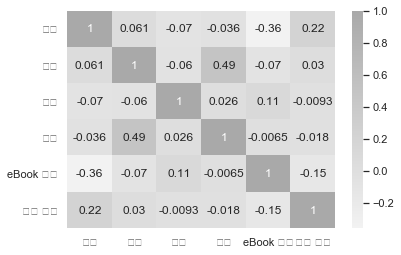

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(spring_x.corr(), annot=True, cmap=cmap)
plt.show()

## 다중공선성 확인 VIF

In [30]:
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from patsy import dmatrices

In [31]:
subtit = spring['부제목']
page = spring['쪽수']
price = spring['정가']
ebook = spring['eBook 여부']
title = spring['제목 길이']
field = spring['분야']
bestseller = spring['베스트셀러 여부']

In [32]:
y, X = dmatrices('bestseller ~ subtit + page + price + ebook + title + field', data=spring, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,14.255437,Intercept
1,1.025828,subtit[T.1]
2,1.328503,page
3,1.343544,price
4,1.161136,ebook
5,1.057517,title
6,1.196605,field


In [33]:
x_data.mean()

부제목             0.660264
쪽수            331.774358
eBook 여부        0.588984
제목 길이          12.021986
정가          16411.219286
평점              8.605508
dtype: float64